In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"munibarafique","key":"f69666f1939cc576145c7e0456563332"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
100% 2.13G/2.13G [00:23<00:00, 156MB/s]
100% 2.13G/2.13G [00:23<00:00, 96.8MB/s]


In [5]:
!unzip leapgestrecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [1]:
import os
dataset_path = '/content/leapGestRecog'
categories = os.listdir(dataset_path)

print("Categories Found:")
for category in categories:
    print(f"{category}: {len(os.listdir(os.path.join(dataset_path, category)))} images")

Categories Found:
05: 10 images
00: 10 images
down: 2000 images
01: 10 images
02: 10 images
04: 10 images
fist: 2000 images
ok: 2000 images
c: 2000 images
08: 10 images
l: 2000 images
06: 10 images
03: 10 images
thumb: 2000 images
palm_moved: 2000 images
07: 10 images
fist_moved: 2000 images
09: 10 images
palm: 2000 images
index: 2000 images


In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

IMG_SIZE = (64, 64)
data = []
labels = []

for category in categories:
    class_path = os.path.join(dataset_path, category)
    print(f"Processing category: {category} with path: {class_path}")

    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        print(f"Loading image: {img_path}")

        if os.path.isfile(img_path):
            try:
                image = load_img(img_path, target_size=IMG_SIZE)
                image = img_to_array(image) / 255.0
                data.append(image)
                labels.append(category)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

data = np.array(data)
labels = np.array(labels)

print(f"Data Shape: {data.shape}, Labels Shape: {labels.shape}")

Streaming output truncated to the last 5000 lines.
Loading image: /content/leapGestRecog/fist_moved/frame_09_04_0075.png
Loading image: /content/leapGestRecog/fist_moved/frame_03_04_0029.png
Loading image: /content/leapGestRecog/fist_moved/frame_05_04_0132.png
Loading image: /content/leapGestRecog/fist_moved/frame_09_04_0059.png
Loading image: /content/leapGestRecog/fist_moved/frame_03_04_0053.png
Loading image: /content/leapGestRecog/fist_moved/frame_02_04_0071.png
Loading image: /content/leapGestRecog/fist_moved/frame_07_04_0187.png
Loading image: /content/leapGestRecog/fist_moved/frame_07_04_0034.png
Loading image: /content/leapGestRecog/fist_moved/frame_02_04_0140.png
Loading image: /content/leapGestRecog/fist_moved/frame_03_04_0175.png
Loading image: /content/leapGestRecog/fist_moved/frame_02_04_0133.png
Loading image: /content/leapGestRecog/fist_moved/frame_06_04_0031.png
Loading image: /content/leapGestRecog/fist_moved/frame_03_04_0041.png
Loading image: /content/leapGestRecog/f

In [3]:
import os
import shutil
dataset_path = '/content/leapGestRecog'

gesture_dirs = {
    '01_palm': 'palm',
    '02_l': 'l',
    '03_fist': 'fist',
    '04_fist_moved': 'fist_moved',
    '05_thumb': 'thumb',
    '06_index': 'index',
    '07_ok': 'ok',
    '08_palm_moved': 'palm_moved',
    '09_c': 'c',
    '10_down': 'down'
}

for gesture in gesture_dirs.values():
    gesture_path = os.path.join(dataset_path, gesture)
    if not os.path.exists(gesture_path):
        os.makedirs(gesture_path)

for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    if os.path.isdir(category_path):
        for subfolder in os.listdir(category_path):
            subfolder_path = os.path.join(category_path, subfolder)

            if subfolder in gesture_dirs:
                gesture_name = gesture_dirs[subfolder]
                new_gesture_dir = os.path.join(dataset_path, gesture_name)

                for img_file in os.listdir(subfolder_path):
                    img_file_path = os.path.join(subfolder_path, img_file)

                    if os.path.isfile(img_file_path):
                        shutil.move(img_file_path, new_gesture_dir)
                        print(f"Moved {img_file} to {new_gesture_dir}")

In [4]:
from PIL import Image
import numpy as np

def load_images_and_labels(dataset_path):
    images = []
    labels = []
    gesture_dirs = {
        'palm': 0,
        'l': 1,
        'fist': 2,
        'fist_moved': 3,
        'thumb': 4,
        'index': 5,
        'ok': 6,
        'palm_moved': 7,
        'c': 8,
        'down': 9
    }

    for gesture_name, label in gesture_dirs.items():
        gesture_path = os.path.join(dataset_path, gesture_name)

        if os.path.isdir(gesture_path):
            for filename in os.listdir(gesture_path):
                if filename.endswith('.png'):
                    image_path = os.path.join(gesture_path, filename)
                    try:
                        img = Image.open(image_path)
                        img = img.resize((64, 64))
                        img_array = np.array(img) / 255.0

                        images.append(img_array)
                        labels.append(label)
                    except Exception as e:
                        print(f"Error loading or resizing image {image_path}: {e}")

    return np.array(images), np.array(labels)

images, labels = load_images_and_labels(dataset_path)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

Training data shape: (16000, 64, 64)
Validation data shape: (2000, 64, 64)
Test data shape: (2000, 64, 64)


In [6]:
import os
import numpy as np
from PIL import Image

def load_images_and_labels(dataset_path):
    images = []
    labels = []
    gesture_dirs = {
        'palm': 0,
        'l': 1,
        'fist': 2,
        'fist_moved': 3,
        'thumb': 4,
        'index': 5,
        'ok': 6,
        'palm_moved': 7,
        'c': 8,
        'down': 9
    }

    for gesture_name, label in gesture_dirs.items():
        gesture_path = os.path.join(dataset_path, gesture_name)

        if os.path.isdir(gesture_path):
            for filename in os.listdir(gesture_path):
                if filename.endswith('.png'):
                    image_path = os.path.join(gesture_path, filename)
                    try:
                        img = Image.open(image_path)
                        img = img.resize((64, 64))
                        img_array = np.array(img) / 255.0
                        images.append(img_array)
                        labels.append(label)
                    except Exception as e:
                        print(f"Error loading or resizing image {image_path}: {e}")

    return np.array(images), np.array(labels)

dataset_path = '/content/leapGestRecog'
images, labels = load_images_and_labels(dataset_path)

from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [14]:
print("Loaded images shape:", images.shape)
print("Loaded labels shape:", labels.shape)

Loaded images shape: (20000, 64, 64)
Loaded labels shape: (20000,)


In [15]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (16000, 64, 64)
y_train shape: (16000,)


In [7]:
X_train = X_train.astype('float32')

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

if X_train.ndim == 3:
    X_train = np.stack((X_train,) * 3, axis=-1)

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=16)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras import backend as K

K.clear_session()

if X_train.ndim == 3:
    X_train = np.stack((X_train,) * 3, axis=-1)

number_of_classes=10
y_train_one_hot = to_categorical(y_train, num_classes=number_of_classes)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(X_train, y_train_one_hot, batch_size=16)

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=number_of_classes, activation='softmax'))

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

try:
    history = model.fit(train_generator,
                        steps_per_epoch=len(X_train) // 16,
                        epochs=5)
except Exception as e:
    print("Error during model training:", e)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 100s 98ms/step - accuracy: 0.1489 - loss: 2.2365
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 100s 99ms/step - accuracy: 0.2802 - loss: 1.9517
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 142s 99ms/step - accuracy: 0.3605 - loss: 1.7741


In [16]:
print(f"Original shape of X_test: {X_test.shape}")

if X_test.shape[-1] == 1:
    X_test = np.repeat(X_test, 3, axis=-1)

print(f"Shape of X_test after repeating: {X_test.shape}")

Original shape of X_test: (2000, 64, 64, 3)
Shape of X_test after repeating: (2000, 64, 64, 3)


In [17]:
from tensorflow.keras import layers

input_shape = (64, 64, 3)
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

In [18]:
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(number_of_classes, activation='softmax'))

In [20]:
if X_test.ndim == 3:
    X_test = np.stack((X_test,) * 3, axis=-1)

y_test_one_hot = to_categorical(y_test, num_classes=number_of_classes)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow(X_test, y_test_one_hot, batch_size=16)

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

test_generator = test_datagen.flow(X_test, y_test_one_hot, batch_size=16)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

  3/125 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.1250 - loss: 2.3026  

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.1130 - loss: 2.3026
Test Accuracy: 10.55%


In [23]:
model.save('gesture_recognition_model.h5')

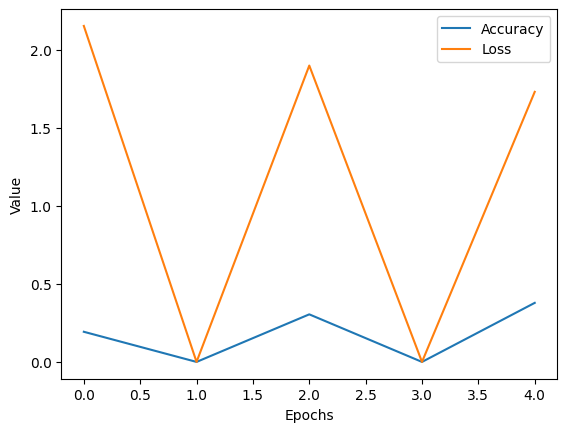

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

In [25]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step
